In [1]:
# Parameters
name = "2020-01-01-till-2021-02-28-tycho-brahe"
n_rows = None


# Clean : trip statistics

# Purpose
There are some outliers in the trip statistics that will need to be removed.

# Setup

In [2]:
# %load imports.py
#%load imports.py
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
width=20
height=3
plt.rcParams["figure.figsize"] = (width,height)
sns.set(rc={'figure.figsize':(width,height)})

#import seaborn as sns
import os
from collections import OrderedDict

from IPython.display import display

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
pd.set_option("display.max_columns", None)

import folium
import plotly.express as px
import plotly.graph_objects as go

import sys
import os
sys.path.append('../')
from src.visualization import visualize
import scipy.integrate

try:
    import trip_statistics
except:
    sys.path.append('../../../../../src/models/pipelines/longterm/scripts/prepdata/trip_statistics')
    import trip_statistics

try:
    import trip_id
except:
    sys.path.append('../../../../../src/models/pipelines/longterm/scripts/prepdata/trip')
    import trip_id

try:
    import clean_statistics
except:
    sys.path.append('../../../../../src/models/pipelines/longterm/scripts/prepdata/clean_statistics')
    import clean_statistics

    

    
    

In [3]:
df_stat = trip_statistics.load_output_as_pandas_dataframe('id_statistics.parquet')
df_stat.head()

,latitude,longitude,heading,power_em_thruster_1,power_em_thruster_2,power_em_thruster_3,power_em_thruster_4,power_em_thruster_total,cog,sin_pm1,sin_pm2,sin_pm3,sin_pm4,cos_pm1,cos_pm2,cos_pm3,cos_pm4,power_heeling,sog,trip_no,trip_time,reversing,trip_direction,start_time,end_time,start_index,end_index
trip_no,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,56.037954,12.657033,66.737998,414.949513,445.467671,360.205492,355.449956,1576.072631,72.063481,-0.018140,0.014034,-0.211319,-0.166250,-0.672925,-0.675743,-0.809043,-0.803045,3.197520,4.410812,0.0,564.010629,0.0,0,2020-01-01 08:31:19+00:00,2020-01-01 08:50:15+00:00,0,1128
1.0,56.034732,12.654767,259.289806,371.334951,398.771845,402.959547,384.335761,1557.402104,254.945688,0.091474,0.168342,0.084861,0.074851,0.777466,0.791547,0.676049,0.679201,0.851133,4.057768,1.0,617.560680,1.0,1,2020-01-01 09:02:02+00:00,2020-01-01 09:22:52+00:00,1129,2364
2.0,56.037121,12.657407,66.003030,384.353535,403.802571,356.265381,348.166208,1492.587695,72.778990,0.006538,0.041393,-0.123441,-0.077197,-0.711043,-0.712979,-0.758449,-0.755415,2.035813,4.428171,2.0,544.000918,0.0,0,2020-01-01 09:31:04+00:00,2020-01-01 09:49:13+00:00,2365,3453
3.0,56.035049,12.653717,260.582487,493.094571,522.021016,496.622592,468.592820,1980.330998,255.338827,0.021302,0.097969,0.098880,0.087748,0.720291,0.731599,0.716466,0.718973,4.789842,4.354430,3.0,570.503503,1.0,1,2020-01-01 10:01:22+00:00,2020-01-01 10:20:25+00:00,3454,4595
4.0,56.037667,12.658731,66.705934,408.187609,436.029668,358.720768,348.050611,1550.988656,72.043185,0.009410,0.043116,-0.013878,0.039514,-0.657692,-0.658992,-0.696761,-0.695680,5.315009,4.270926,4.0,572.500000,0.0,0,2020-01-01 10:31:47+00:00,2020-01-01 10:50:52+00:00,4596,5741


In [4]:
df_stat.shape

(8215, 27)

In [5]:
df_stat.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 8215 entries, 0.0 to 8214.0
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   latitude                 8215 non-null   float64            
 1   longitude                8215 non-null   float64            
 2   heading                  8215 non-null   float64            
 3   power_em_thruster_1      8215 non-null   float64            
 4   power_em_thruster_2      8215 non-null   float64            
 5   power_em_thruster_3      8215 non-null   float64            
 6   power_em_thruster_4      8215 non-null   float64            
 7   power_em_thruster_total  8215 non-null   float64            
 8   cog                      8215 non-null   float64            
 9   sin_pm1                  8215 non-null   float64            
 10  sin_pm2                  8215 non-null   float64            
 11  sin_pm3                 

In [6]:
df_stat.describe()

,latitude,longitude,heading,power_em_thruster_1,power_em_thruster_2,power_em_thruster_3,power_em_thruster_4,power_em_thruster_total,cog,sin_pm1,sin_pm2,sin_pm3,sin_pm4,cos_pm1,cos_pm2,cos_pm3,cos_pm4,power_heeling,sog,trip_no,trip_time,reversing,trip_direction,start_index,end_index
count,8215.000000,8215.000000,8215.000000,8215.000000,8215.000000,8215.000000,8215.000000,8215.000000,8215.000000,8215.000000,8215.000000,8215.000000,8215.000000,8215.000000,8215.000000,8215.000000,8215.000000,8215.000000,8215.000000,8215.000000,8215.000000,8215.000000,8215.000000,8215.000000,8215.000000
mean,56.036849,12.655975,164.519166,395.384810,422.211448,370.842808,359.969358,1548.408425,163.512763,-0.026697,0.022220,-0.003787,0.013725,0.034136,0.036434,0.011160,0.012620,2.131804,4.087789,4107.000000,581.133510,0.497776,0.504078,30965.453074,30972.121729
std,0.001648,0.006775,88.637971,94.958535,102.649113,101.949087,92.479943,356.849461,90.315653,0.182015,0.182446,0.191859,0.187917,0.711530,0.716646,0.725677,0.727124,4.746872,0.743066,2371.610564,304.737060,0.498352,0.500014,17903.705891,17903.932808
min,56.032610,12.617190,58.467020,0.000000,0.000000,0.000000,0.000000,0.000000,23.310000,-0.998050,-1.000000,-0.999970,-1.000000,-0.997971,-0.999918,-0.993153,-0.996954,-0.083333,0.200633,0.000000,0.000000,0.000000,0.000000,0.000000,35.000000
25%,56.035641,12.653843,76.852386,342.244592,362.451901,311.338715,306.852291,1348.517924,73.533764,-0.083248,-0.039177,-0.084369,-0.057992,-0.681222,-0.684492,-0.721906,-0.721809,0.316599,4.020953,2053.500000,557.000000,0.000000,0.000000,15566.500000,15569.500000
50%,56.036963,12.656292,164.850347,399.126087,427.543796,375.324300,365.412060,1568.730327,164.089483,-0.031997,0.018011,-0.000318,0.010570,0.025636,0.022550,0.015050,0.025450,1.430651,4.219182,4107.000000,583.000000,0.491269,1.000000,30787.000000,30791.000000
75%,56.037845,12.657564,252.610524,456.796296,489.382442,438.269812,420.224118,1774.880402,254.599891,0.016857,0.068206,0.054463,0.067746,0.758908,0.766749,0.745913,0.749403,2.822938,4.387612,6160.500000,613.000000,1.000000,1.000000,46224.000000,46224.000000
max,56.043610,12.691150,269.260619,978.333333,1059.232356,879.164640,835.109448,3486.773620,316.720000,0.989780,0.999970,1.000000,0.999970,0.976560,0.987745,0.918569,0.993410,138.500000,5.364258,8214.000000,17943.202648,1.000000,1.000000,69264.000000,69263.000000


# Clean

In [8]:
df_clean = clean_statistics.process(df=df_stat, path='id_statistics_clean.parquet')

In [12]:
df_compare = df_stat.copy()
df_compare['item'] = 'raw'

df_clean['item'] = 'clean'
df_compare = df_compare.append(df_clean)

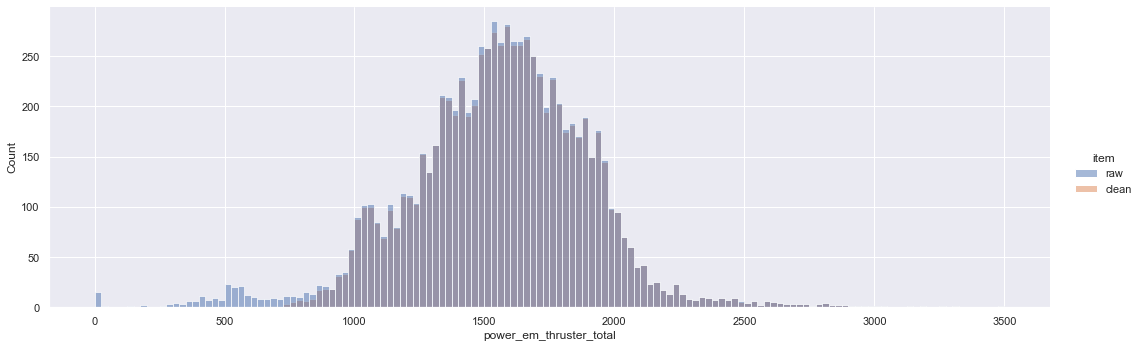

In [13]:
sns.displot(df_compare, x='power_em_thruster_total', hue='item', binwidth=25, aspect=3)

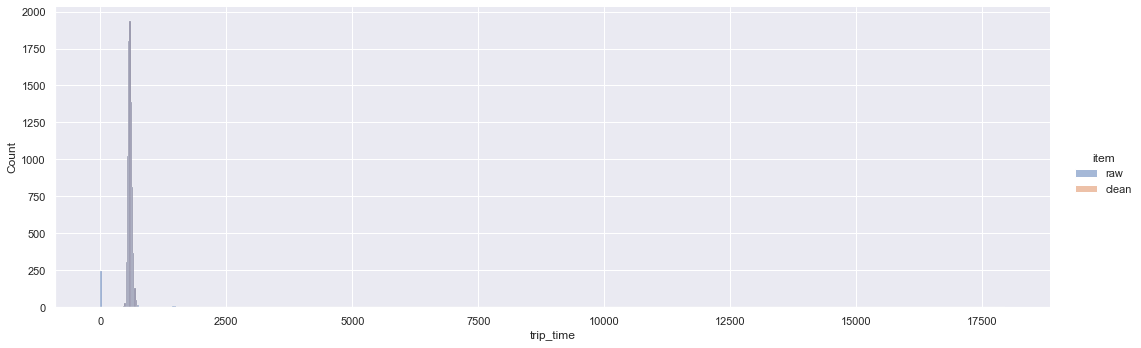

In [14]:
sns.displot(df_compare, x='trip_time', hue='item', binwidth=25, aspect=3)